# ALGORITMO A*

### Librerias Necesarias

In [ ]:
pip install timeit

In [ ]:
pip install heapq

In [ ]:
pip install networkx

In [23]:
import heapq
import timeit
import networkx as nx
import matplotlib.pyplot as plt

Distancia más corta desde el nodo 0 al nodo 6
Nodo: 0, distancia: 0
Nodo: 1, distancia: 2
Nodo: 2, distancia: 6
Nodo: 3, distancia: 7
Nodo: 4, distancia: 17
Nodo: 5, distancia: 22
Nodo: 6, distancia: 19

Tiempo de ejecución de A* (promedio de 1000 ejecuciones): 0.000010 segundos


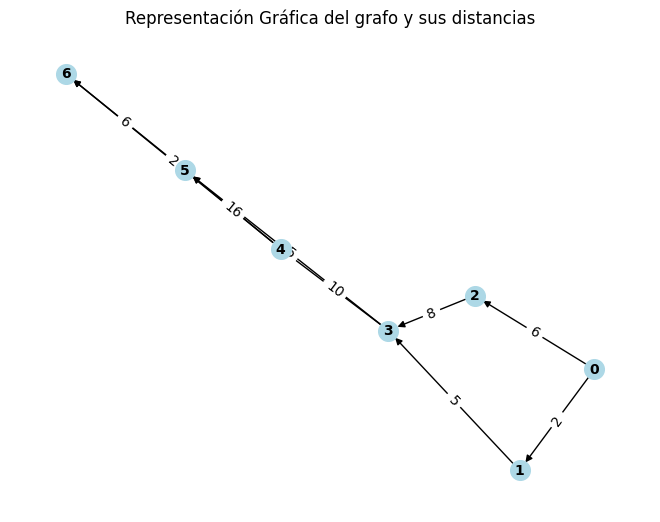

In [93]:
# Función heurística (en este caso, la distancia en línea recta o una estimación)
def heuristica(nodo_actual, nodo_objetivo):
    return 0  # Heurística simple

def a_estrella(grafo, nodo_origen, nodo_objetivo):
    distancias = {nodo: float('inf') for nodo in grafo}
    distancias[nodo_origen] = 0
    cola_prioridad = [(0 + heuristica(nodo_origen, nodo_objetivo), 0, nodo_origen)]

    while cola_prioridad:
        f_actual, g_actual, nodo_actual = heapq.heappop(cola_prioridad)

        if nodo_actual == nodo_objetivo:
            break

        if g_actual > distancias[nodo_actual]:
            continue

        for vecino, peso in grafo[nodo_actual].items():
            nueva_distancia = g_actual + peso

            if nueva_distancia < distancias[vecino]:
                distancias[vecino] = nueva_distancia
                f = nueva_distancia + heuristica(vecino, nodo_objetivo)
                heapq.heappush(cola_prioridad, (f, nueva_distancia, vecino))

    return distancias

def graficar_grafo(grafo):
    Grafox = nx.DiGraph()

    for nodo, vecinos in grafo.items():
        for vecino, pesos in vecinos.items():
            Grafox.add_edge(nodo, vecino, weight=pesos)

    pos = nx.spring_layout(Grafox)
    nx.draw(Grafox, pos, with_labels=True, node_color='lightblue', node_size=200,
            font_size=10, font_weight='bold')
    labels = nx.get_edge_attributes(Grafox, 'weight')
    nx.draw_networkx_edge_labels(Grafox, pos, edge_labels=labels, font_size=10)
    plt.title("Representación Gráfica del grafo y sus distancias")
    plt.show()

# Definición del grafo
grafo = {
    '0': {'1': 2, '2': 6},
    '1': {'3': 5},
    '2': {'3': 8},
    '3': {'5': 15, '4': 10},
    '4': {'5': 16, '6': 2},
    '5': {'6': 6},
    '6': {},
}

# Nodo objetivo para A*
nodo_objetivo = '6'

# Medir tiempo de ejecución de A* con timeit
tiempo_ejecucion = timeit.timeit(
    lambda: a_estrella(grafo, '0', nodo_objetivo),  # Función a medir
    number=1000  # Número de repeticiones para mayor precisión
)

# Recorrido de la lista de resultados
resultado = a_estrella(grafo, '0', nodo_objetivo)
print(f"Distancia más corta desde el nodo 0 al nodo {nodo_objetivo}")
for nodo, distancia in resultado.items():
    print(f"Nodo: {nodo}, distancia: {distancia}")

# Mostrar el tiempo de ejecución promedio
print(f"\nTiempo de ejecución de A* (promedio de 1000 ejecuciones): {tiempo_ejecucion / 1000:.6f} segundos")

# Graficar el grafo
graficar_grafo(grafo)